<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-nov2021/blob/main/12_Modulos_y_paquetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#El sistema de importación (import)
Python incluye un sistema de importación que permite:

1. organizar códigos grandes en pequeñas porciones reutilizables;
2. compartir tu código con otras personas e, inversamente, usar el código de otras personas.

Los conceptos principales del sistema de importación son los de módulo y paquete. 

Un módulo es un archivo de Python (por lo general con extensión .py, en ocasiones .pyd si se trata de un módulo compilado). 

Un paquete es una carpeta que en su interior contiene módulos u otros paquetes. 

A pesar de estas definiciones, a menudo los pythonistas usan los términos módulo y paquetes indistintamente, y realmente no hay mucho problema con eso. En término generales, cualquier cosa que pueda importarse (que ahora veremos de qué se trata) es un módulo. Usando las palabras reservadas from e import que provee el sistema, podemos utilizar variables, funciones, clases, excepciones y cualquier otro objeto que estén dentro de un módulo.

Veamos un ejemplo. Creemos dos archivos dentro de un mismo directorio con los nombres principal.py y mimodulo.py. Dentro de este último pondremos algunas funciones y variables:

In [ ]:
# mimodulo.py
pi = 3.141592
def sumar(a, b):
    return a + b
def es_par(n):
    return n % 2 == 0

Si queremos usar algún objeto de este archivo desde nuestro principal.py, debemos importarlo vía la palabra reservada import y luego hacer uso de alguno de los objetos prefijando el nombre del módulo y un punto.

Todos los import deben ir siempre, por convención, al inicio del archivo.

Cuando importamos un módulo, le indicamos a Python que queremos hacer uso de algún objeto dentro del mismo. En este caso, estamos usando la función sumar() y la variable pi. No hemos utilizado es_par(), pero no hay inconveniente. No es necesario usar todos los objetos de un módulo. Es común importar un módulo y solo usar uno o unos pocos objetos. Nótese que al indicar import mimodulo, no especificamos la extensión del archivo: el mimodulo podría ser un archivo mimodulo.py o mimodulo.pyd; Python importará el primero que encuentre.

El primer lugar donde buscará Python cuando le indicamos que debe importar un módulo es en la carpeta local o el directorio actual de trabajo (current working directory). El directorio actual de trabajo es la ubicación desde la cual un programa es ejecutado. Por ejemplo, si ejecutamos un archivo de Python desde la terminal, la ubicación donde esté la terminal al momento de ejecutar el archivo es el directorio actual de trabajo. Si ejecutamos un archivo desde un editor de código (como Geany, Visual Studio Code o PyCharm), el directorio actual de trabajo por lo general es la misma carpeta donde se encuentra el archivo en cuestión. (Para más información sobre el directorio actual de trabajo, véase La línea de comandos (o terminal) para pythonistas).

Si Python no encuentra el módulo en el directorio actual de trabajo, buscará en las carpetas Lib y Lib/site-packages, que se encuentran en el directorio de instalación de Python. De modo que cualquier módulo que se encuentre dentro de alguna de esas dos carpetas podrá ser importado desde cualquier ubicación. Si revisamos la carpeta Lib, encontraremos ahí ya gran cantidad de módulos y paquetes:

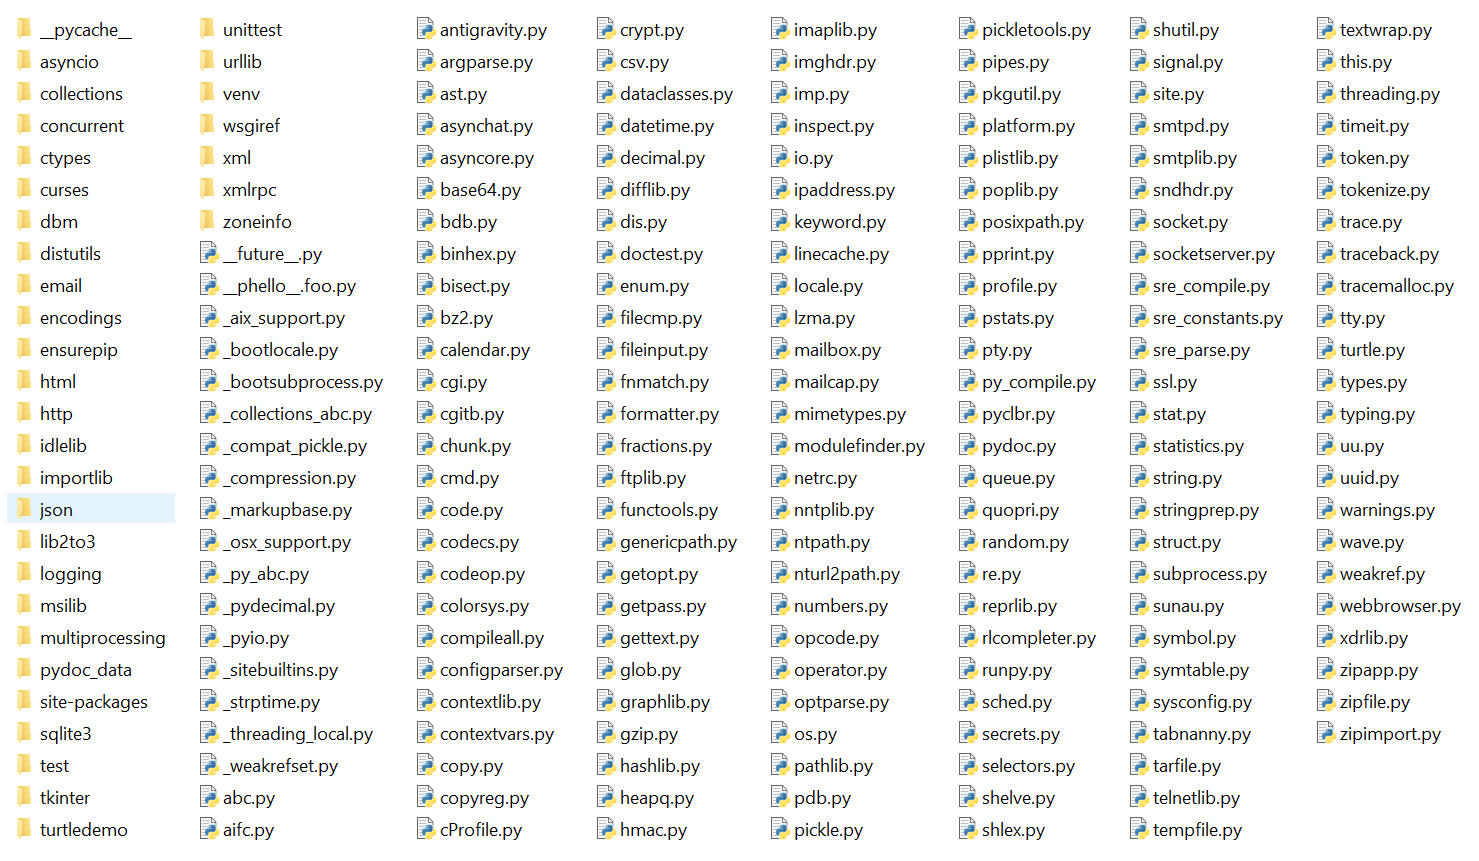

La librería o biblioteca estándar es un conjunto de módulos y paquetes que se incluyen con cada instalación de Python y proveen soluciones para problemas comunes (y otros no tanto). Por ejemplo, el módulo estándar statistics contiene una función mean() para calcular el promedio de una lista de números:

In [3]:
import statistics
statistics.mean([1, 3, 7, 10])

5.25

En la carpeta Lib/site-packages se almacenan los módulos y paquetes desarrollados por la comunidad (listados en pypi.org), los cuales podemos instalar vía pip, que es la herramienta oficial del lenguaje para gestionar paquetes de terceros.

##Formas de importar un módulo
Acabamos de ver cómo importar un módulo usando la palabra reservada import. Una sintaxis alternativa es la siguiente:

In [ ]:
# principal.py
from mimodulo import sumar, pi
resultado = sumar(7, 5)
print(resultado)
print(pi)

Al usar la forma from ... import ..., le indicamos a Python específicamente cuáles objetos queremos importar de un módulo en particular. Luego, los objetos importados se incorporan a nuestro archivo como cualquier otro objeto definido dentro de él. Por esta razón, no es necesario (ni posible) usar el prefijo mimodulo. con este método.

Es importante saber que no hay diferencia de rendimiento entre este método y el anterior (import). Cuando usamos la sintaxis import mimodulo, simplemente le indicamos a Python que en algún momento haremos uso de algún objeto dentro de mimodulo; luego los objetos se importarán en efecto cuando sean utilizados. ¿Cuál de las dos sintaxis conviene utilizar, entonces? Depende de lo que se esté importando. En la mayoría de los casos es indiferente, y podemos elegir la sintaxis que nos resulte más cómoda. Pero en ciertas ocasiones una sintaxis tiene mejor legibilidad que otra. Si tenemos una línea de estas características:

In [ ]:
import twisted.python.threadpool
tp = twisted.python.threadpool.Threadpool()

Para evitar tener que indicar toda la serie de módulos y paquetes (twisted.python.threadpool) como prefijo a la clase Threadpool, seguramente sea más sencillo y cómodo decir:

In [ ]:
from twisted.python.threadpool import Threadpool
tp = Threadpool()

A veces, en cambio, usar el nombre del módulo como prefijo es muy esclarecedor, por lo cual conviene usar import. Por ejemplo, la función choice() («elegir») dentro del módulo estándar random («aleatorio»), selecciona un elemento aleatoriamente de la lista que pasamos como argumento. Si optamos por from random import choice, usaríamos la función de esta manera:

In [ ]:
print(choice([1, 2, 3, 4, 5]))

Al ver esta línea de código, no sabemos con qué criterio choice() selecciona un elemento. En cambio, esto es bien claro:

In [ ]:
print(random.choice([1, 2, 3, 4, 5]))

Cuando nos enfrentamos a un caso donde ninguna sintaxis tiene evidentemente un beneficio sobre la otra (en cuanto legibilidad), lo mejor es seguir la convención que encontremos en los ejemplos de la documentación oficial del módulo con el que estemos trabajando.

#Módulos y paquetes
##Módulos
Un módulo es un archivo de Python cuyos objetos (funciones, clases, excepciones, etc.) pueden ser accedidos desde otro archivo. Se trata simplemente de una forma de organizar grandes códigos.

Consideremos, por ejemplo, un archivo aritmetica.py que contenga las siguientes definiciones.

In [ ]:
def sumar(a, b):
    return a + b

def restar(a, b):
    return a - b

def mult(a, b):
    return a * b

def div(a, b):
    return a / b

Podemos acceder a ellas desde otro archivo de Python ubicado en la misma ruta importando el módulo.

In [ ]:
import aritmetica

print(aritmetica.sumar(7, 5))

Una sintaxis alternativa para importar objetos desde un módulo es la siguiente.

In [ ]:
from aritmetica import sumar

print(sumar(7, 5))

Nótese que, en este segundo caso, no se prefija el nombre del módulo al invocar al objeto importado. Podemos importar varios objetos separándolos por comas.

In [ ]:
from aritmetica import sumar, restar, mult, div

print(sumar(7, 5))
print(restar(7, 5))
print(mult(7, 5))
print(div(7, 5))

O bien, para importar todos los objetos dentro de un módulo:

In [ ]:
from aritmetica import *

Podemos hacer que un módulo esté visible para cualquier archivo ubicándolo en la carpeta Lib dentro del directorio de instalación de Python (e.g. C:\Python36\Lib).

##Paquetes
Un paquete es una carpeta que contiene varios módulos. Siguiendo el ejemplo anterior, podemos diseñar un paquete matematica creando una carpeta con la siguiente estructura.

In [ ]:
matematica/
    |-- __init__.py
    |-- aritmetica.py
    |-- geometria.py

Debe contener siempre un archivo __init__.py (por el momento vacío) para que Python entienda que se trata de un paquete y no de una simple carpeta. Así, podemos acceder a alguno de los módulos del paquete de la siguiente manera.

In [ ]:
import matematica.aritmetica

print(matematica.aritmetica.sumar(7, 5))

O bien de la siguiente.

In [ ]:
from matematica import aritmetica

print(aritmetica.sumar(7, 5))

También, esta otra:

In [ ]:
from matematica.aritmetica import sumar

print(sumar(7, 5))

Python incluye una inmensa cantidad de módulos y paquetes en su instalación (aún más grande es aquella desarrollada por la comunidad, de la que hablaremos más adelante), a los que se conoce como librería estándar

#Librería estándar
La librería estándar es un conjunto de módulos y paquetes que se distribuyen junto con Python. Muchas de las operaciones más comúnes de la programación diaria ya están implementadas en ella, de modo que podemos concentrarnos en lo que realmente nos ocupa. Encontrarás la lista de todos los módulos y paquetes junto con su documentación en docs.python.org.

Por ejemplo, el módulo math contiene una colección de operaciones matemáticas comúnes.

In [ ]:
import math

# Raíz cuadrada.
print(math.sqrt(16))

O bien random, que implementa funciones para trabajar con números aleatorios.

In [ ]:
from random import randint, choice

# Número aleatorio entre 1 y 10.
print(randint(1, 10))
# Retorna un elemento aleatorio de la lista.
print(choice(["Python", "C", "C++", "Java"]))

Recuerda que tienes a tu disposición la función help(), ideal para ser empleada en la consola interactiva cuando quieras saber qué hace una función o cómo utilizarla. ¡Toda la librería estándar está ampliamente documentada!

#Instalando módulos de terceros
Como decíamos en la sección anterior, aún más grande es la colección de módulos y paquetes desarrollados por la enorme comunidad de programadores de Python en todo el mundo. Algunos de ellos tienen su propio lugar en internet, pero la mayoría está alojada en PyPI (Python Package Index).

Cada uno de estos paquetes está identificado por un nombre. Para instalar alguno de ellos, utilizaremos una herramienta llamada pip que se incluye con la instalación de Python. El comando es, entonces, el siguiente.

In [ ]:
pip install paquete

Por ejemplo, para instalar Requests, el paquete más famoso de Python que permite interactuar con servicios HTTP:

In [1]:
pip install requests

Por último debemos importar el paquete para usarlo y así confirmar que el paquete se ha instalado correctamente

In [2]:
import requests
requests.get("https://www.google.com/")

<Response [200]>

¡Excelente! Ya sabemos cómo instalar paquetes desarrollados por la comunidad para utilizarlos en nuestros programas.

Dos grandes ramas en las que se escinde el desarrollo es en aplicaciones de escritorio y aplicaciones web. Te daré algunos consejos para que, si es tu caso, puedas tener una idea para comenzar con alguno de ellos.

#Aplicaciones de escritorio
Python incluye en la librería estándar un paquete llamado tkinter, una librería gráfica pensada para aplicaciones medianas y pequeñas, y por ella razón ideal para empezar.

Otras soluciones más grandes y un tanto más complejas incluyen PyQt/PySide (paquetes de Python para la librería Qt), wxPython (para wxWidgets) y PyGTK (GTK+).

Si bien Python es un lenguaje interpretado, puedes empaquetar una aplicación de escritorio para que pueda ser ejecutada sin la necesidad que los usuarios tengan el intérprete instalado. Para ello te invito a chequear el siguiente artículo: Generar archivo ejecutable con cx_Freeze, PyInstaller y py2exe.

#Aplicaciones web
Python resulta un lenguaje ideal para crear aplicaciones web, de hecho, es utilizado por los gigantes más importantes de internet. Lo más común es servirte de alguno de los muchos web frameworks que facilitan el desarrollo. El más conocido sea probablemente Django. Pero para comenzar te puedo recomendar Flask o web2py, que son más amigables y su potencial es igualmente grande. Otra solución muy potente es Pyramid.

El desarrollo de aplicaciones web en Python difiere de otros lenguajes como PHP o Perl. En ellos se acostumbra a emplear un protocolo bastante primitivo llamado CGI. En Python, en cambio, se utiliza uno más nuevo y potente llamado WSGI. No obstante, dado que todo hosting compartido que utilice Linux tendrá un intérprete de Python, resultará útil también conocer cómo generar scripts que puedan ser ejecutados en la web. Para ello, véase Programación web vía CGI - Una introducción.